In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, ElasticNetCV
from scipy import stats

#Visualization
import matplotlib.pyplot as plt

In [34]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#These columns are no important because of pooling
train = train.drop(columns=["Id"])

print(train.shape, test.shape)

(1460, 80) (1459, 80)


## Data Analysis

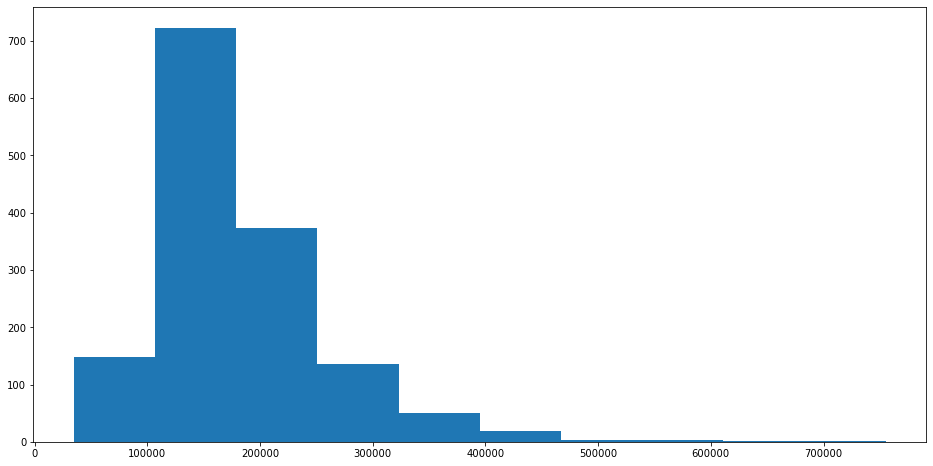

Average Sale Price in Aimes: $ 180921.2
Variation in Sale Price: $ 79415.29


In [3]:
#target variable
y =train["SalePrice"]
fig, ax = plt.subplots(figsize=(16, 8)) 
plt.hist(y)
plt.show()

print(f"Average Sale Price in Aimes: $ {round(np.mean(y),2)}")
print(f"Variation in Sale Price: $ {round(np.std(y),2)}")

on droping columns with missing values features are reduced to 61 columns from 80 columns


<AxesSubplot:>

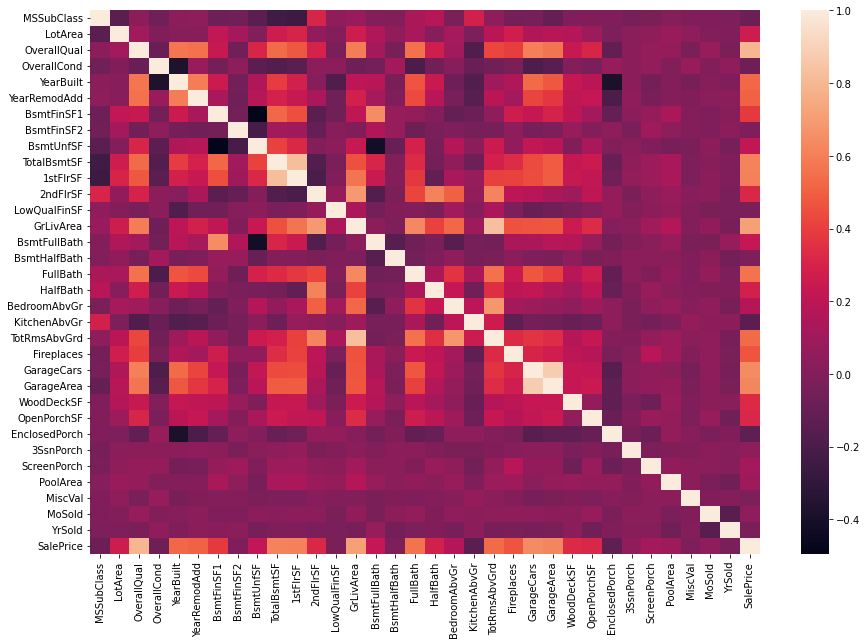

In [4]:
## Find features correlation to SalePrice 
train1 = train.copy().dropna(axis=1)

#Remove columns that have missing data
print(f"on droping columns with missing values features are reduced to {train1.shape[1]} columns from {train.shape[1]} columns")

#Look at correlation for continuous variables
plt.figure(figsize=(15,10))
sns.heatmap(train1.corr())

## Domain Knowledge

### seperate columns by types

In [5]:
#Nominal A variable that has no numerical importance, for example color or city.
categorical_columns_labels = ["MSSubClass", "MSZoning", "Street", "LotShape", "LandContour", "Utilities", 
                               "LotConfig",  "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType",
                              "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", 
                             "Foundation", "Heating","CentralAir","Functional","PavedDrive","SaleType","SaleCondition"]

#Ordinal A variable that has some order associated with it like our place example above
categorical_columns_ranking = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
                              "BsmtExposure","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond",
                              "PoolQC","Fence"]

#Nominal A variable that has no numerical importance, for example color or city.
categorical_columns_ordinal = ["BsmtFullBath", "BsmtHalfBath", "FullBath",
                              "HalfBath", "BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd", "Fireplaces",
                              "GarageCars","BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
                             "1stFlrSF","2ndFlrSF", "LowQualFinSF","BsmtFullBath"]

categorical_columns_year = ["YearBuilt", "YearRemodAdd", "MoSold","YrSold"]

continious_columns = ["LotArea","GrLivArea", "GarageArea","WoodDeckSF","OpenPorchSF",
                     "EnclosedPorch","3SsnPorch", "ScreenPorch", "PoolArea"]

continous_currency = ["MiscVal"]

In [6]:
train2 = train1.copy()
train2 = train2.drop(columns=categorical_columns_year)

In [7]:
#Convert column label using sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train3 = pd.DataFrame([])
for i in categorical_columns_labels:
    le.fit(train2[i])
    train3[i]= le.transform(train2[i])
    

array([[<AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'RoofStyle'}>],
       [<AxesSubplot:title={'center':'RoofMatl'}>,
        <AxesSubplot:title={'center':'Exterior1st'}>]], dtype=object)

<Figure size 1080x576 with 0 Axes>

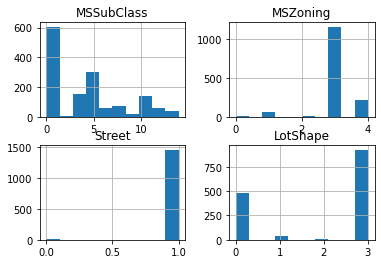

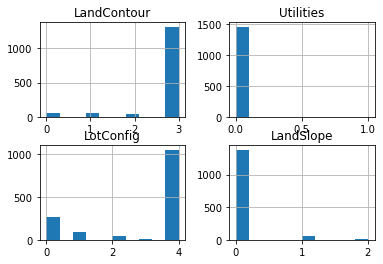

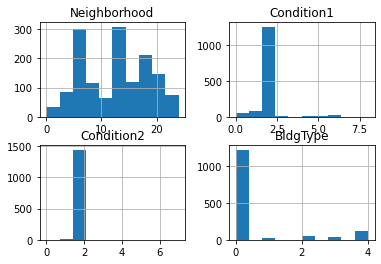

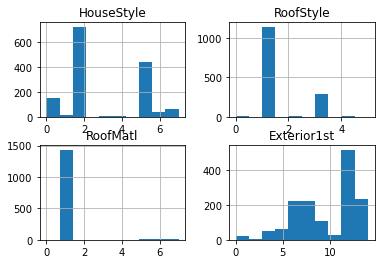

In [8]:
plt.figure(figsize=(15,8))
train3[categorical_columns_labels].iloc[:, :4].hist()
train3[categorical_columns_labels].iloc[:, 4:8].hist()
train3[categorical_columns_labels].iloc[:, 8:12].hist()
train3[categorical_columns_labels].iloc[:, 12:16].hist()

## Outliers detection and removal

<AxesSubplot:>

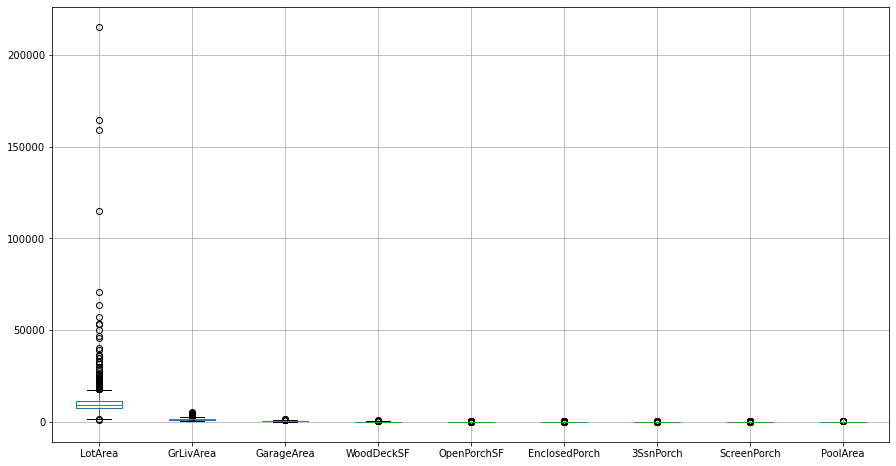

In [9]:
plt.figure(figsize=(15,8))
train2[continious_columns].boxplot()

<AxesSubplot:>

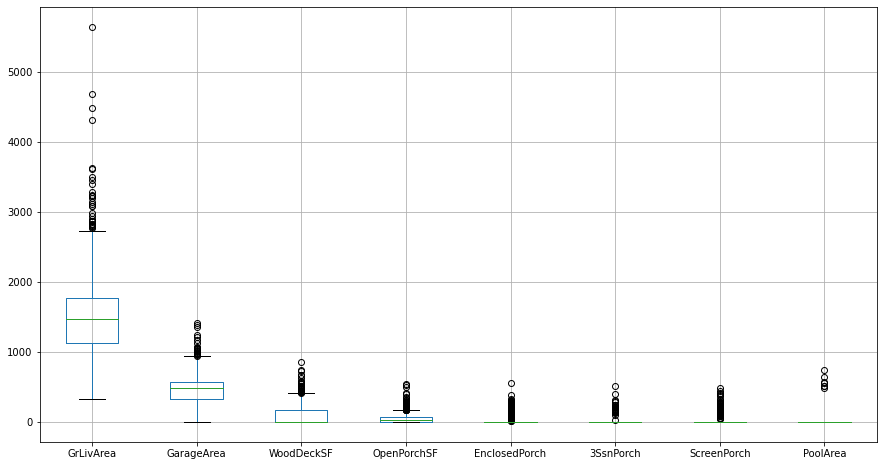

In [10]:
## Lot Area is not useful to us, lets remove it
train4 = train2.drop(columns=["LotArea"])
continious_columns.remove("LotArea")
plt.figure(figsize=(15,8))
train4[continious_columns].boxplot()

<AxesSubplot:>

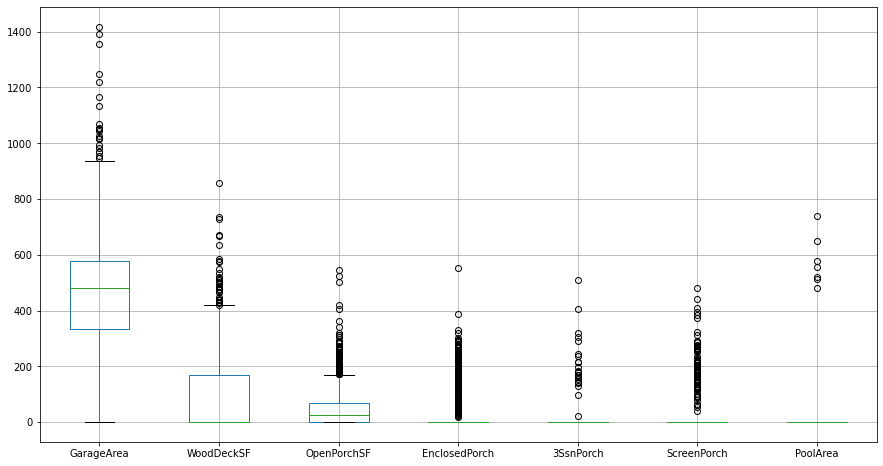

In [11]:
## Lot Area is not useful to us, lets remove it
train4 = train2.drop(columns=["GrLivArea"])
continious_columns.remove("GrLivArea")
plt.figure(figsize=(15,8))
train4[continious_columns].boxplot()

<AxesSubplot:>

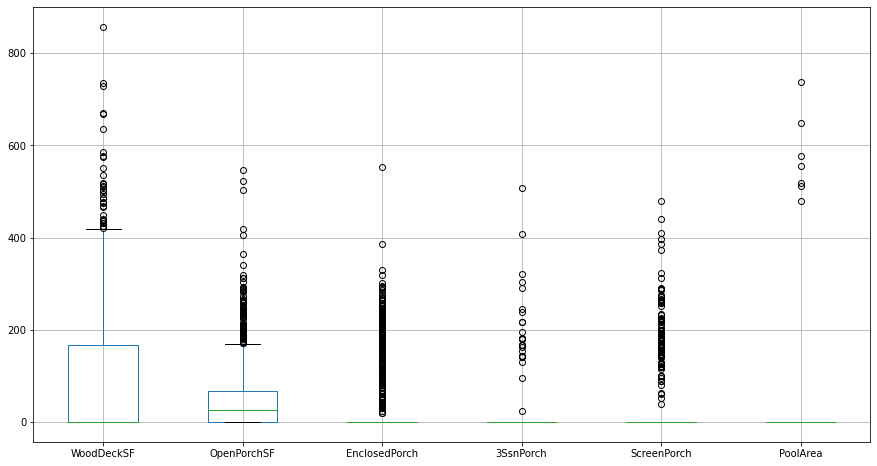

In [12]:
## Lot Area is not useful to us, lets remove it
train4 = train2.drop(columns=["GarageArea"])
continious_columns.remove("GarageArea")
plt.figure(figsize=(15,8))
train4[continious_columns].boxplot()

<AxesSubplot:>

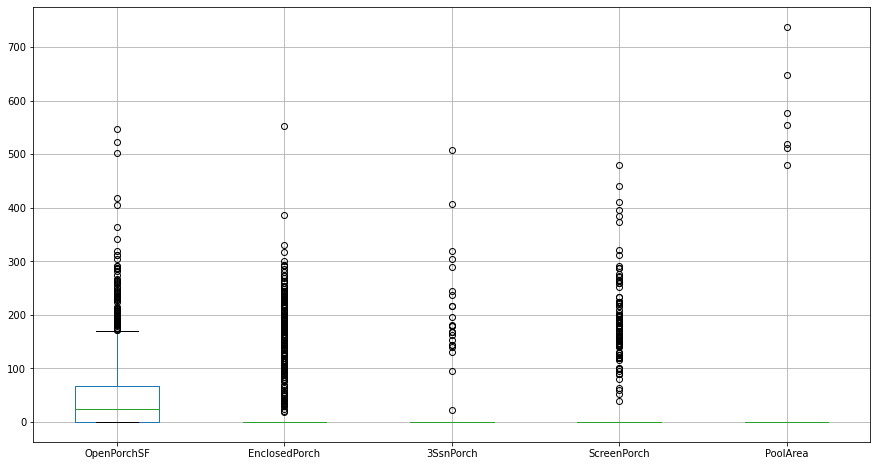

In [13]:
## Lot Area is not useful to us, lets remove it
train4 = train2.drop(columns=["WoodDeckSF"])
continious_columns.remove("WoodDeckSF")
plt.figure(figsize=(15,8))
train4[continious_columns].boxplot()

<AxesSubplot:>

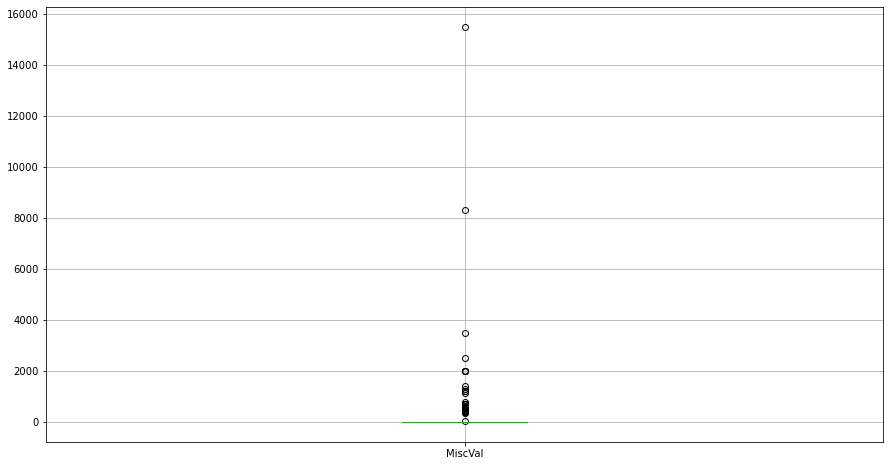

In [14]:
plt.figure(figsize=(15,8))
train4[continous_currency].boxplot()

## Data Processing

In [15]:
#Cleaning first and third set of features where order does not matter
new_l = categorical_columns_ordinal + categorical_columns_labels
train5 = train2[["SalePrice"]].copy()
for col in categorical_columns_labels:  
    strs = f"{col}"
    dummy = pd.get_dummies(train2[col], prefix=strs)
    train5 = pd.concat([train5, dummy], axis=1)
    
for col in categorical_columns_ordinal:  
    strs = f"{col}"
    dummy = pd.get_dummies(train2[col], prefix=strs)
    train5 = pd.concat([train5, dummy], axis=1)

    
train5

,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,...,LowQualFinSF_481,LowQualFinSF_513,LowQualFinSF_514,LowQualFinSF_515,LowQualFinSF_528,LowQualFinSF_572,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3
0,208500,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,181500,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,223500,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,140000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,250000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1456,210000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1457,266500,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1458,142125,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
train2.shape

(1460, 57)

In [17]:
#Creating Ordinal features where Order matters
categorical_columns_ranking_new = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", 
                                  "HeatingQC","KitchenQual"]
le = preprocessing.LabelEncoder()
for i in categorical_columns_ranking_new:
    le.fit(train2[i])
    train5[i] = le.transform(train2[i])
    


In [18]:
train5.shape

(1460, 3713)

In [19]:
train5.columns

Index(['SalePrice', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40',
       'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_75', 'MSSubClass_80',
       ...
       'BsmtFullBath_0', 'BsmtFullBath_1', 'BsmtFullBath_2', 'BsmtFullBath_3',
       'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
       'KitchenQual'],
      dtype='object', length=3713)

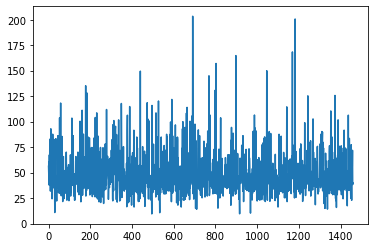

In [20]:
plt.plot(train5.mean(axis=1))
plt.show()

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, \
            StackingRegressor
from sklearn.metrics import r2_score,mean_squared_error,RocCurveDisplay, max_error
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
import sklearn.linear_model as lm

In [22]:
#Lets split training data into train and test
train_x = train5.iloc[:,train5.columns != 'SalePrice']
train_y = train5["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size=0.25, random_state=42)

## Tree based Feature Selection

In [23]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
min_val = np.min(clf.feature_importances_[clf.feature_importances_ > 0.])
max_val = np.max(clf.feature_importances_)
print(min_val)
print(max_val)

6.114655656935988e-06
0.015389973909966088


In [24]:
rerror = []
adrerror = []
gdrerror = []

for param in [6.84e-03,6.84e-02]:
    print(param)
    tem_col = X_train.columns[np.argwhere(clf.feature_importances_ <= param).reshape(-1)]
    X_train1 = X_train[tem_col].astype('int64')
    X_test1 = X_test[tem_col].astype('int64')

    regr = RandomForestRegressor(max_depth=200, random_state=42)
    adr = AdaBoostRegressor(n_estimators=200, random_state=42)
    gdr = GradientBoostingRegressor(n_estimators=200, random_state=42)

    regr.fit(X_train1, y_train)
    adr.fit(X_train1, y_train)
    gdr.fit(X_train1, y_train)

    y_pred_rgr = regr.predict(X_test1)
    y_pred_adr = adr.predict(X_test1)
    y_pred_gdr = gdr.predict(X_test1)
    
    rerror.append(r2_score(y_test, y_pred_rgr))
    adrerror.append(r2_score(y_test, y_pred_adr))
    gdrerror.append(r2_score(y_test, y_pred_gdr))

0.00684
0.0684


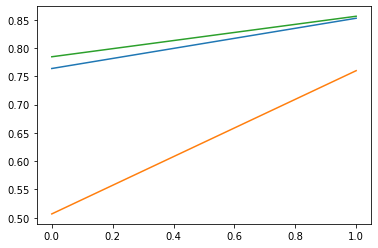

3689

In [26]:
plt.plot(rerror)
plt.plot(adrerror)
plt.plot(gdrerror)
plt.show()

#best parameter at #4 6.84e-02
#select features
len(X_train.columns[np.argwhere(clf.feature_importances_ <= 6.84e-03).reshape(-1)])

## Lasso Based Feature selection

In [27]:
from sklearn.linear_model import LassoCV

In [28]:
reg = LassoCV(cv=10, random_state=42, fit_intercept=False).fit(X_train,y_train)
print("train Score", reg.score(X_train,y_train))
print("test Score", reg.score(X_test,y_test))
sel_col1 = X_train.columns[reg.coef_ > 0]
sel_col1

train Score 0.7945697344147304
test Score 0.8066227247436147


Index(['MSSubClass_20', 'MSSubClass_60', 'MSZoning_RL', 'LotConfig_CulDSac',
       'LandSlope_Mod', 'Condition1_Norm', 'BldgType_1Fam', 'RoofStyle_Hip',
       'Foundation_PConc', 'SaleType_New', 'BsmtFullBath_1', 'FullBath_3',
       'HalfBath_1', 'BedroomAbvGr_4', 'TotRmsAbvGrd_10', 'Fireplaces_2',
       'GarageCars_3', 'BsmtFullBath_1', 'OverallQual', 'OverallCond',
       'ExterCond'],
      dtype='object')

## Feature Selection Elastic Net

In [29]:
reg = ElasticNetCV(cv=10, random_state=42, fit_intercept=False).fit(X_train,y_train)
print("train Score", reg.score(X_train,y_train))
print("test Score", reg.score(X_test,y_test))
sel_col1 = X_train.columns[reg.coef_ > 0]
sel_col1

train Score -4.498706638859804
test Score -3.7535462079528665


Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSSubClass_120',
       ...
       'LowQualFinSF_0', 'BsmtFullBath_0', 'BsmtFullBath_1', 'BsmtFullBath_2',
       'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
       'KitchenQual'],
      dtype='object', length=186)

## Model Building Tree based

In [30]:
selected_features = ['MSSubClass_20', 'MSSubClass_60', 'MSZoning_RL', 'LotConfig_CulDSac',
       'LandSlope_Mod', 'Condition1_Norm', 'BldgType_1Fam', 'RoofStyle_Hip',
       'Foundation_PConc', 'SaleType_New', 'BsmtFullBath_1', 'FullBath_3',
       'HalfBath_1', 'BedroomAbvGr_4', 'TotRmsAbvGrd_10', 'Fireplaces_2',
       'GarageCars_3', 'BsmtFullBath_1', 'OverallQual', 'OverallCond',
       'ExterCond']

X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

regr = RandomForestRegressor(max_depth=200, random_state=42)
adr = AdaBoostRegressor(n_estimators=200, random_state=42)
gdr = GradientBoostingRegressor(n_estimators=200, random_state=42)

regr.fit(X_train1, y_train)
adr.fit(X_train1, y_train)
gdr.fit(X_train1, y_train)

y_pred_rgr = regr.predict(X_test1)
y_pred_adr = adr.predict(X_test1)
y_pred_gdr = gdr.predict(X_test1)
    
#metrics for exlaining  R^2 adj R^2,  metrics for model performance testing MSE, RMSE, MAE
print(f"RandomForestRegressor: R^2 = {r2_score(y_test, y_pred_rgr)}, max_error={max_error(y_test, y_pred_rgr) }");
print(f"AdaBoostRegressor: R^2 = {r2_score(y_test, y_pred_adr)}, max_error={max_error(y_test, y_pred_adr) }");
print(f"GradientBoostingRegressor: R^2 = {r2_score(y_test, y_pred_gdr)}, max_error={max_error(y_test, y_pred_gdr) }");

RandomForestRegressor: R^2 = 0.8256284648673072, max_error=185268.88
AdaBoostRegressor: R^2 = 0.7571929383716374, max_error=216509.69874476985
GradientBoostingRegressor: R^2 = 0.8252024924099309, max_error=221340.4060827344


## Validation on Test Data

In [46]:
test = pd.read_csv("test.csv")
test1 = test.copy()
train2 = test1.drop(columns=categorical_columns_year)
temp3 = test["Id"]
for col in categorical_columns_labels:  
    strs = f"{col}"
    dummy = pd.get_dummies(train2[col], prefix=strs)
    temp3 = pd.concat([temp3, dummy], axis=1)
    
for col in categorical_columns_ordinal:  
    strs = f"{col}"
    dummy = pd.get_dummies(train2[col], prefix=strs)
    temp3 = pd.concat([temp3, dummy], axis=1)
    
le = preprocessing.LabelEncoder()
for i in categorical_columns_ranking_new:
    le.fit(train2[i])
    temp3[i] = le.transform(train2[i])


In [49]:
list(temp3.columns)

['Id',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborho